<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 151.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 198.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 165.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 162.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 168.2 MB/s eta 0:00:00


Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [5]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [6]:
# 1. Count the number of duplicate rows in dataset.
duplicate_count = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')


Number of duplicate rows: 20


In [11]:
# 2. Display the first 5 duplicates rows
duplicates = df[df.duplicated(keep=False)]
print(duplicates.head())  # Display the first few duplicate rows


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.

In [12]:
## Write your code here
# Identify duplicate rows based on selected columns
grouping_cols = ['MainBranch', 'Employment', 'RemoteWork']
duplicates = df[df.duplicated(grouping_cols, keep=False)]

# Find which columns have identical values within these duplicate rows
identical_counts = (duplicates.groupby(grouping_cols)
                    .nunique() == 1).sum(axis=0)

# Sort columns by how often they have identical values
identical_counts = identical_counts.sort_values(ascending=False)

# Display results
print("Columns frequently identical within duplicates:\n")
print(identical_counts)

Columns frequently identical within duplicates:

Check                    319
ICorPM                    97
AIThreat                  88
SOAccount                 85
AINextLess integrated     76
                        ... 
YearsCodePro               8
TechEndorse                8
BuyNewTool                 7
CodingActivities           1
ResponseId                 0
Length: 111, dtype: int64


2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.

In [13]:
# decide on a threshold to define "frequently."
# Filtering: Use the identical_counts Series to filter for columns meeting your threshold.

threshold_count = 90 # Example: Counts greater than 100
frequent_cols = identical_counts[identical_counts >= threshold_count]

# Displaying Results: Print the frequent_cols Series to see the columns that meet your criteria:
print("Frequently Identical Columns:")
print(frequent_cols)

Frequently Identical Columns:
Check     319
ICorPM     97
dtype: int64


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


1. Create visualizations to show the distribution of duplicates across different categories.

In [15]:
!pip install matplotlib

In [16]:
!pip install seaborn

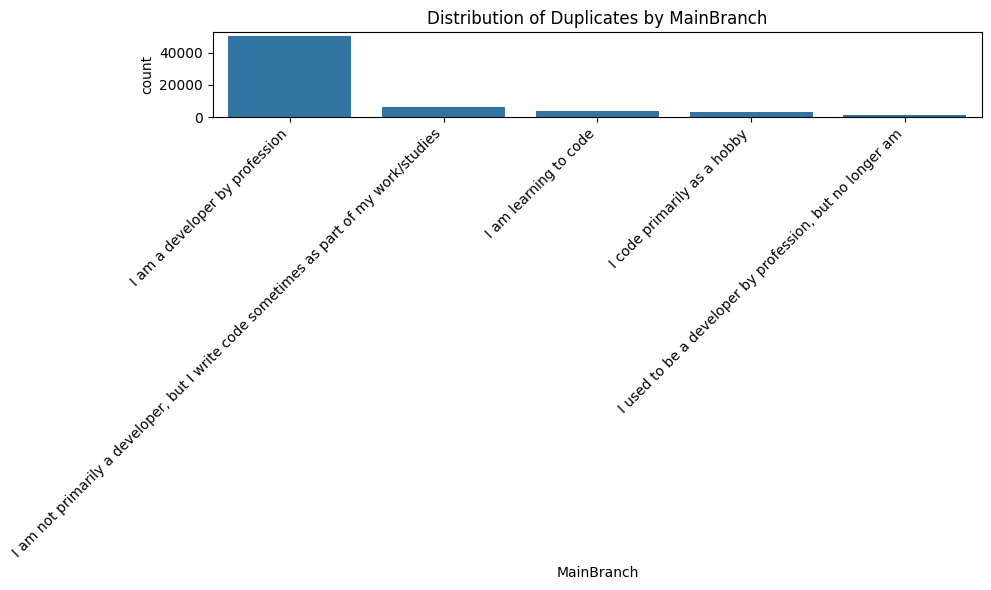

/tmp/ipykernel_301/2042453061.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


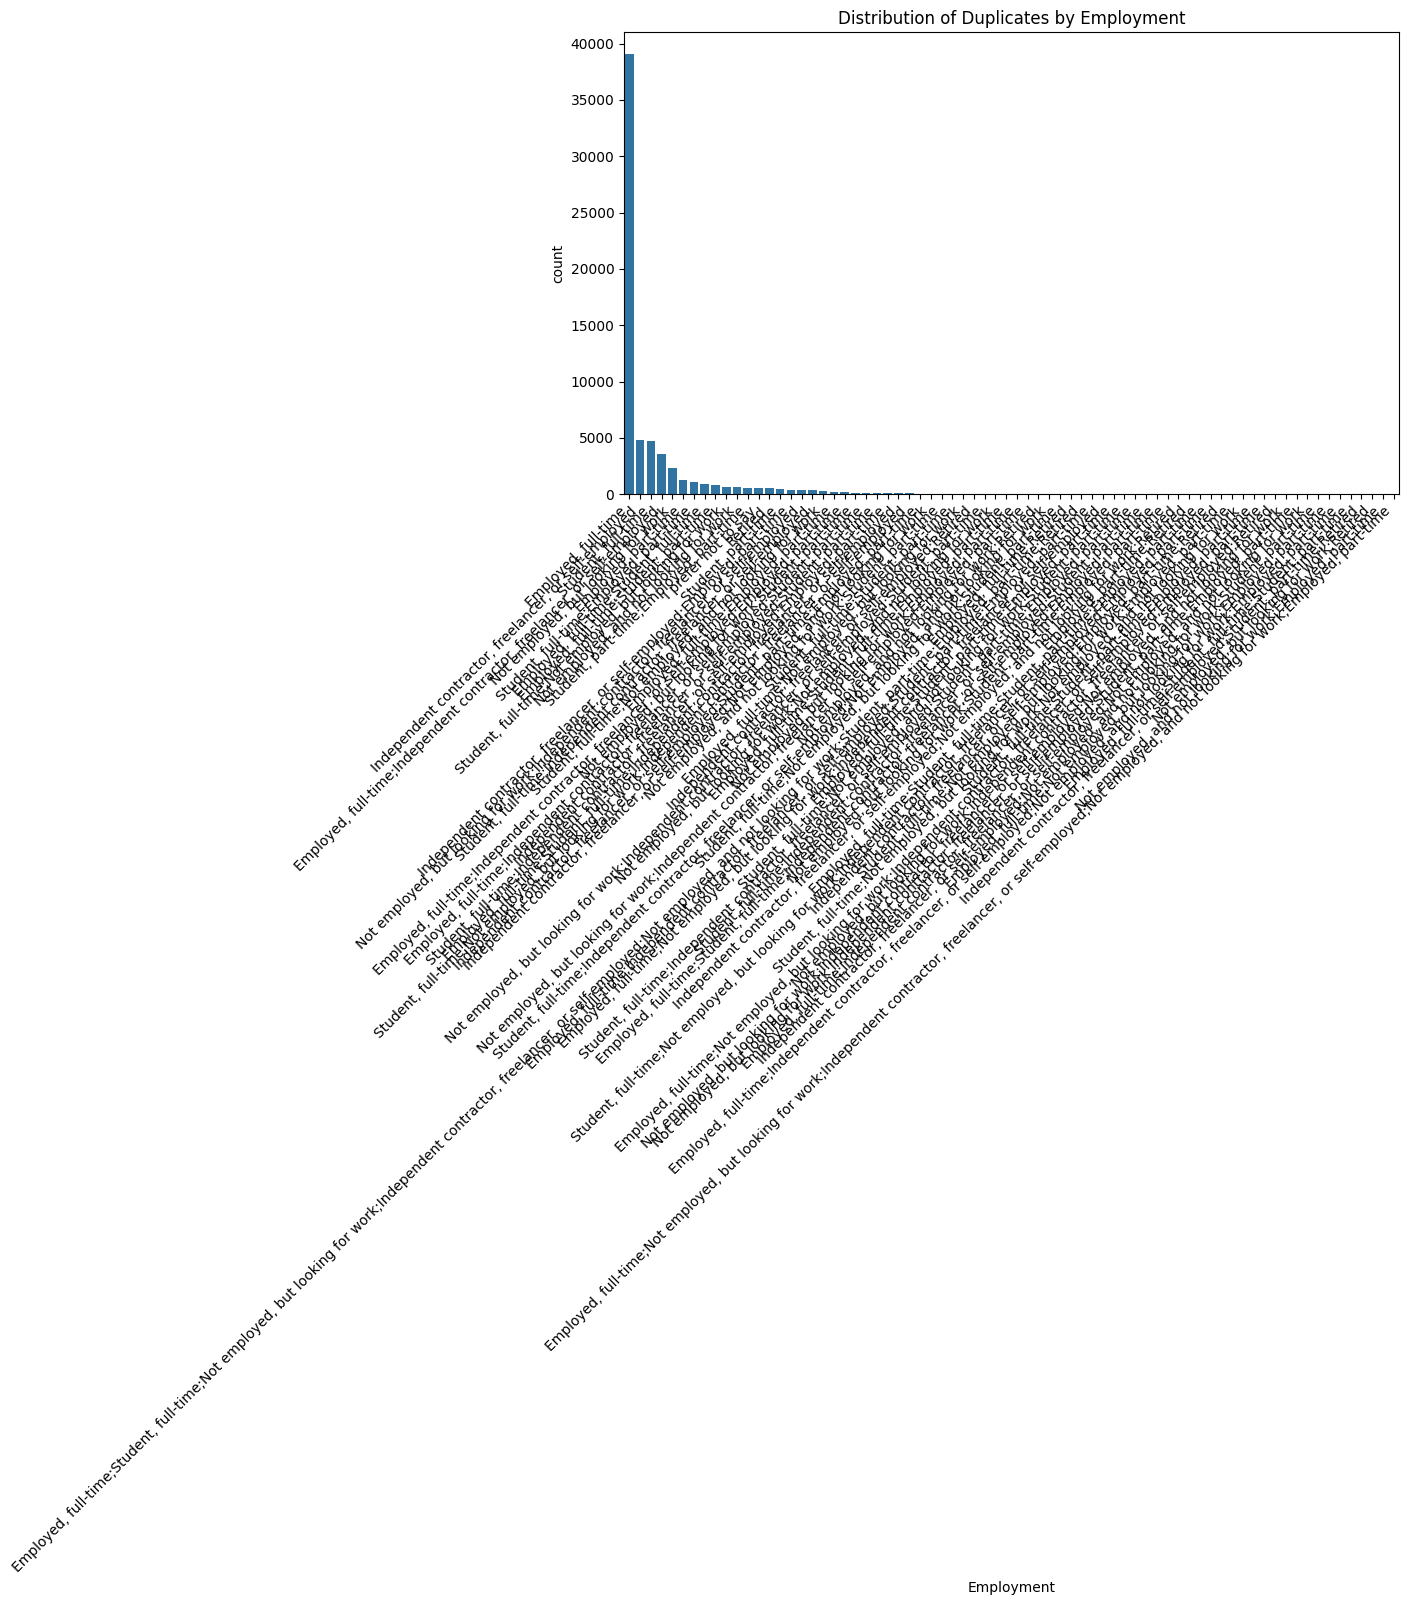

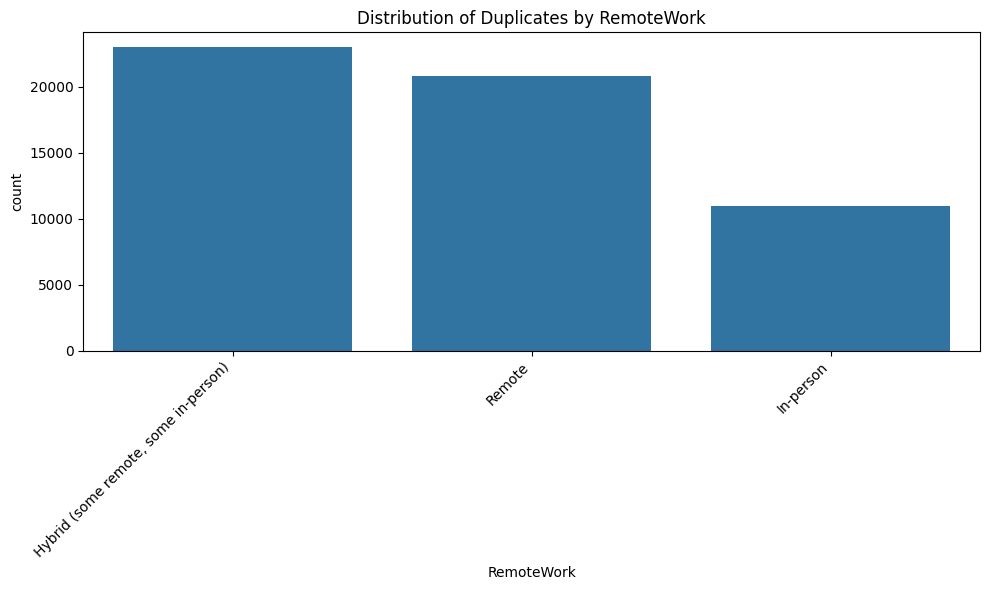

In [17]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# # 1. Countplot for Categorical Columns:

grouping_cols = ['MainBranch', 'Employment', 'RemoteWork']

for col in grouping_cols: 
    plt.figure(figsize=(10, 6))
    sns.countplot(data=duplicates, x=col, order=duplicates[col].value_counts().index) 
    plt.title(f'Distribution of Duplicates by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.

/tmp/ipykernel_301/542356262.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


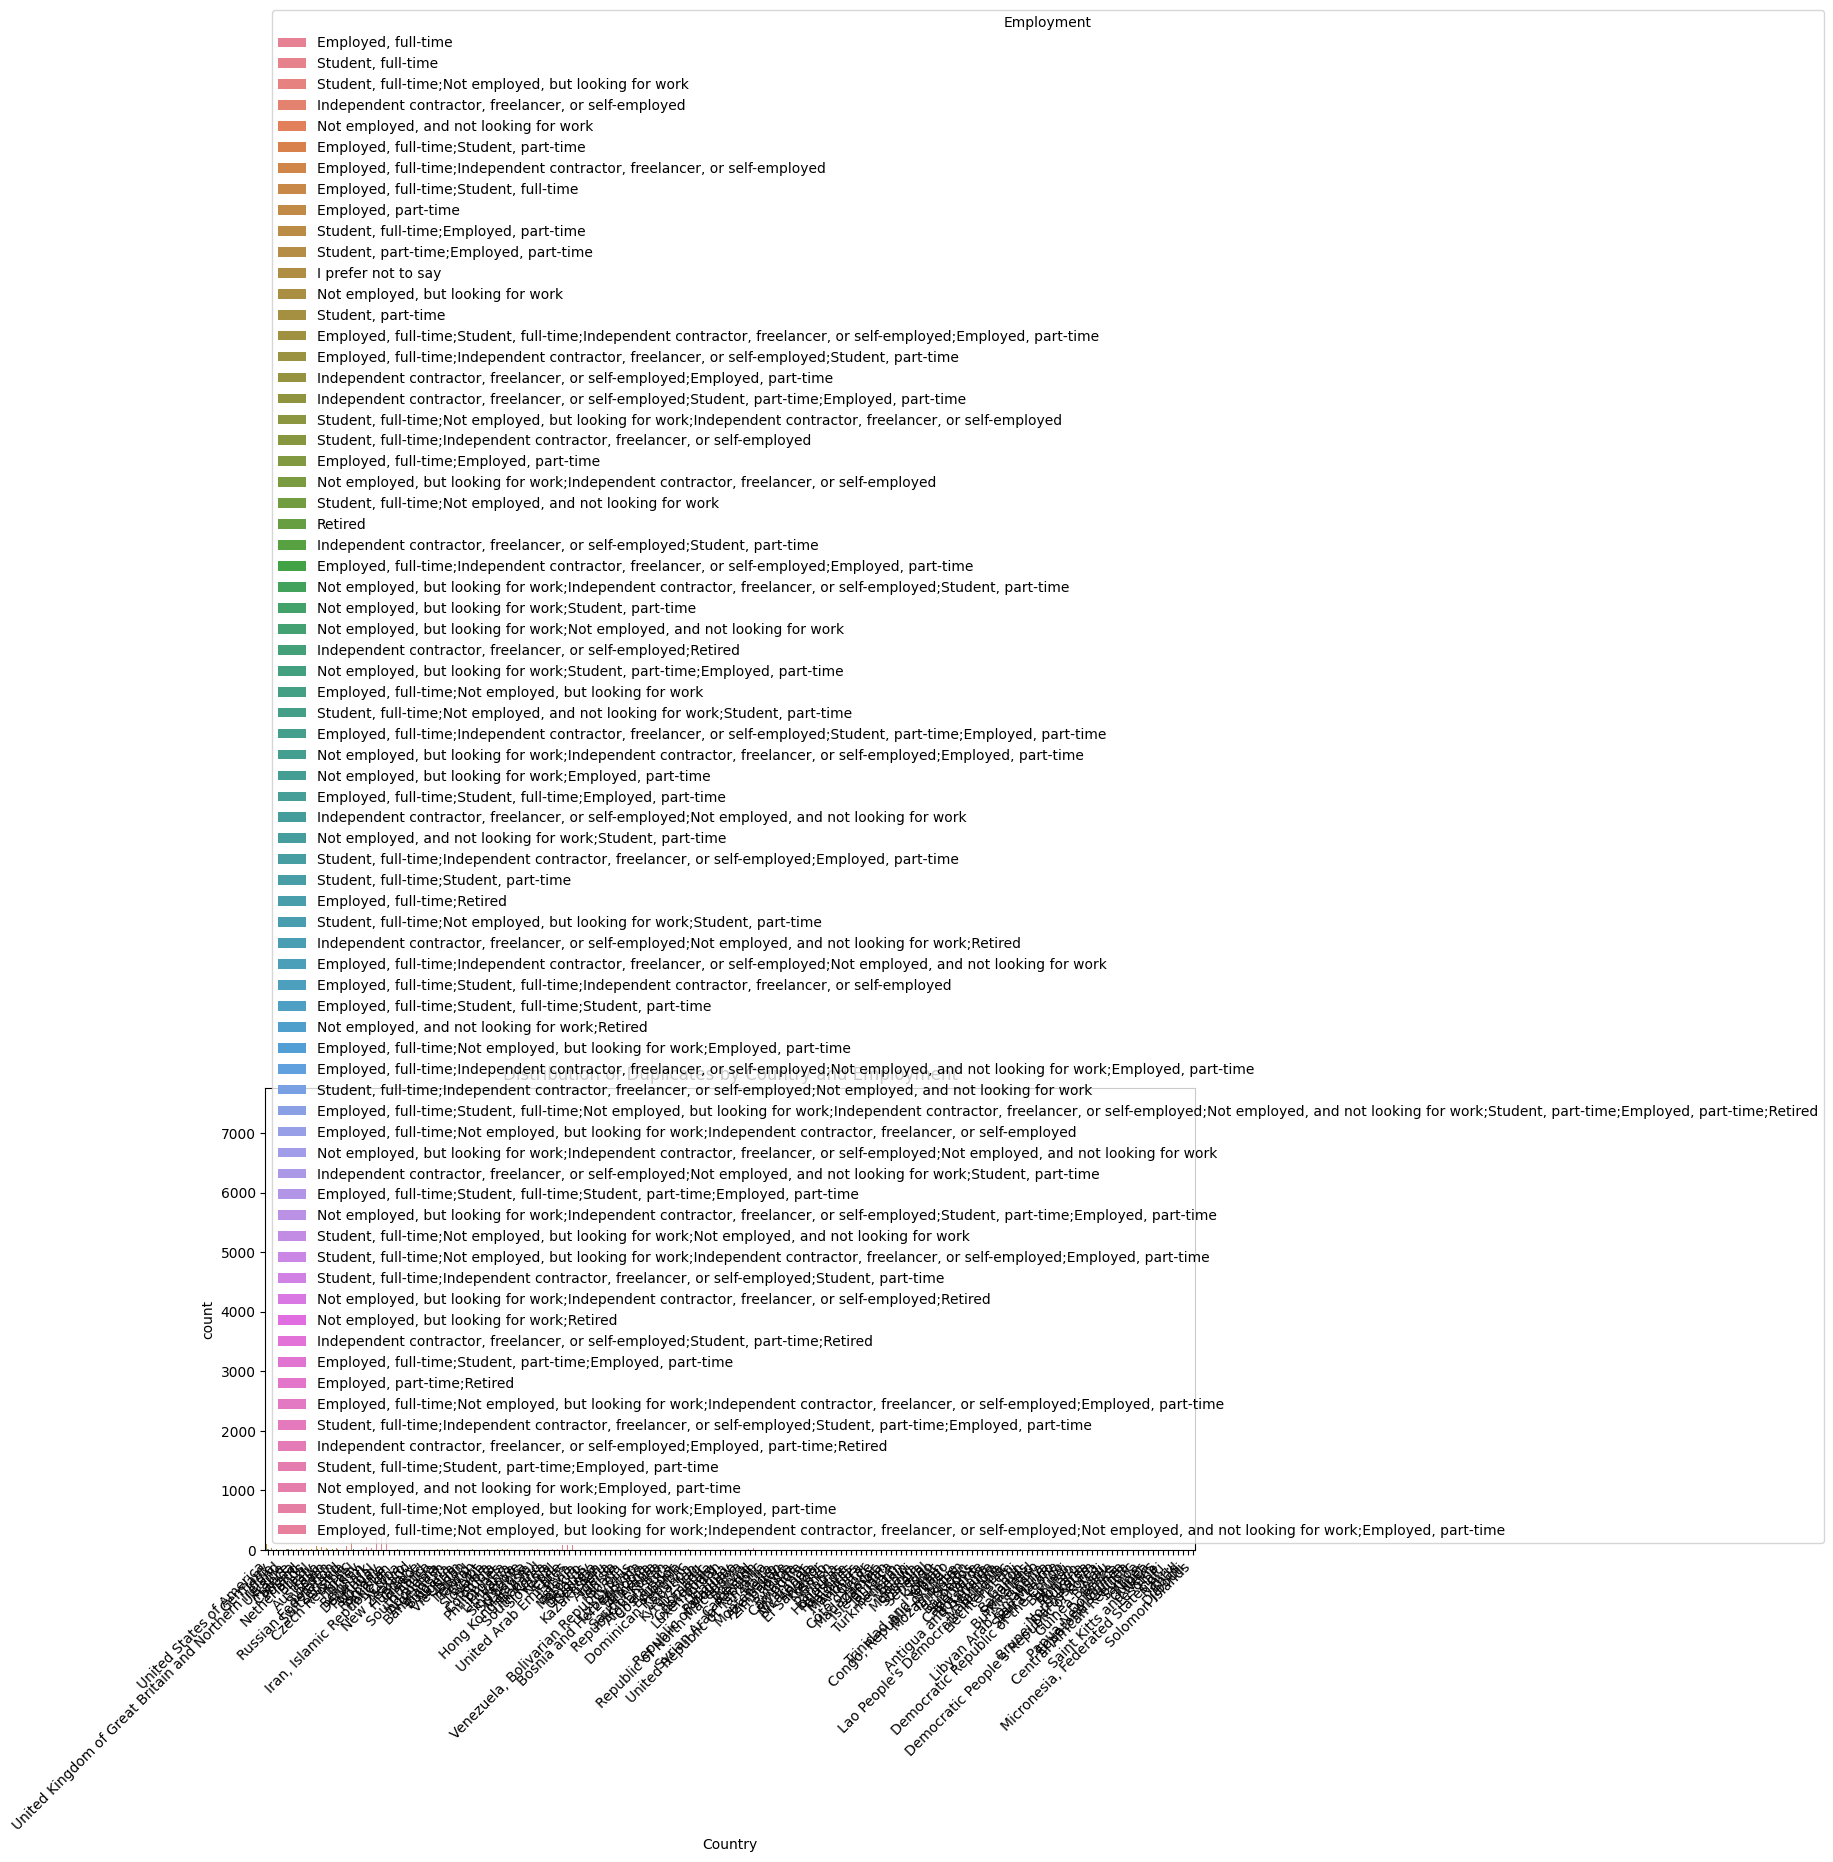

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ... (Your existing code to create the 'duplicates' DataFrame) ...

# 1. Bar Chart for Country and Employment:

plt.figure(figsize=(12, 6))
sns.countplot(data=duplicates, x='Country', hue='Employment', order=duplicates['Country'].value_counts().index)
plt.title('Distribution of Duplicates by Country and Employment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [20]:
## Write your code here
critical_cols = ['MainBranch', 'Employment', 'RemoteWork'] # Example
df_deduplicated = df.drop_duplicates(subset=critical_cols, keep='first') # Keep the first occurrence
# Or keep='last' for the last, or keep=False to remove all duplicates.

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
